# Add 10% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## Age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')


--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 10)

Outliers found:


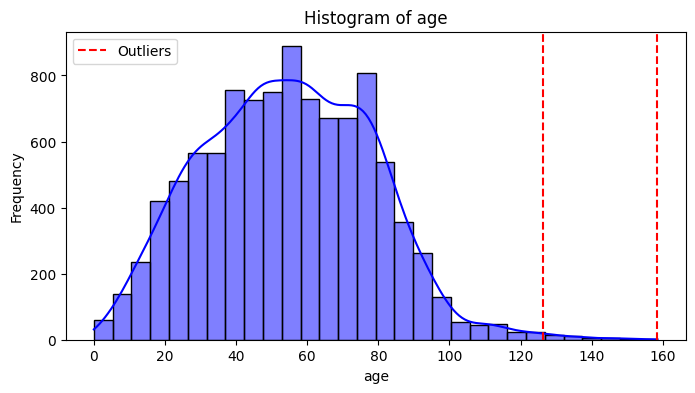

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1541
           1       0.77      0.94      0.85      1455

    accuracy                           0.83      2996
   macro avg       0.85      0.84      0.83      2996
weighted avg       0.85      0.83      0.83      2996

Node Labels:
 Annotation(0.60399, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6988\nvalue = [3486.0, 3502.0]\nclass = 1')


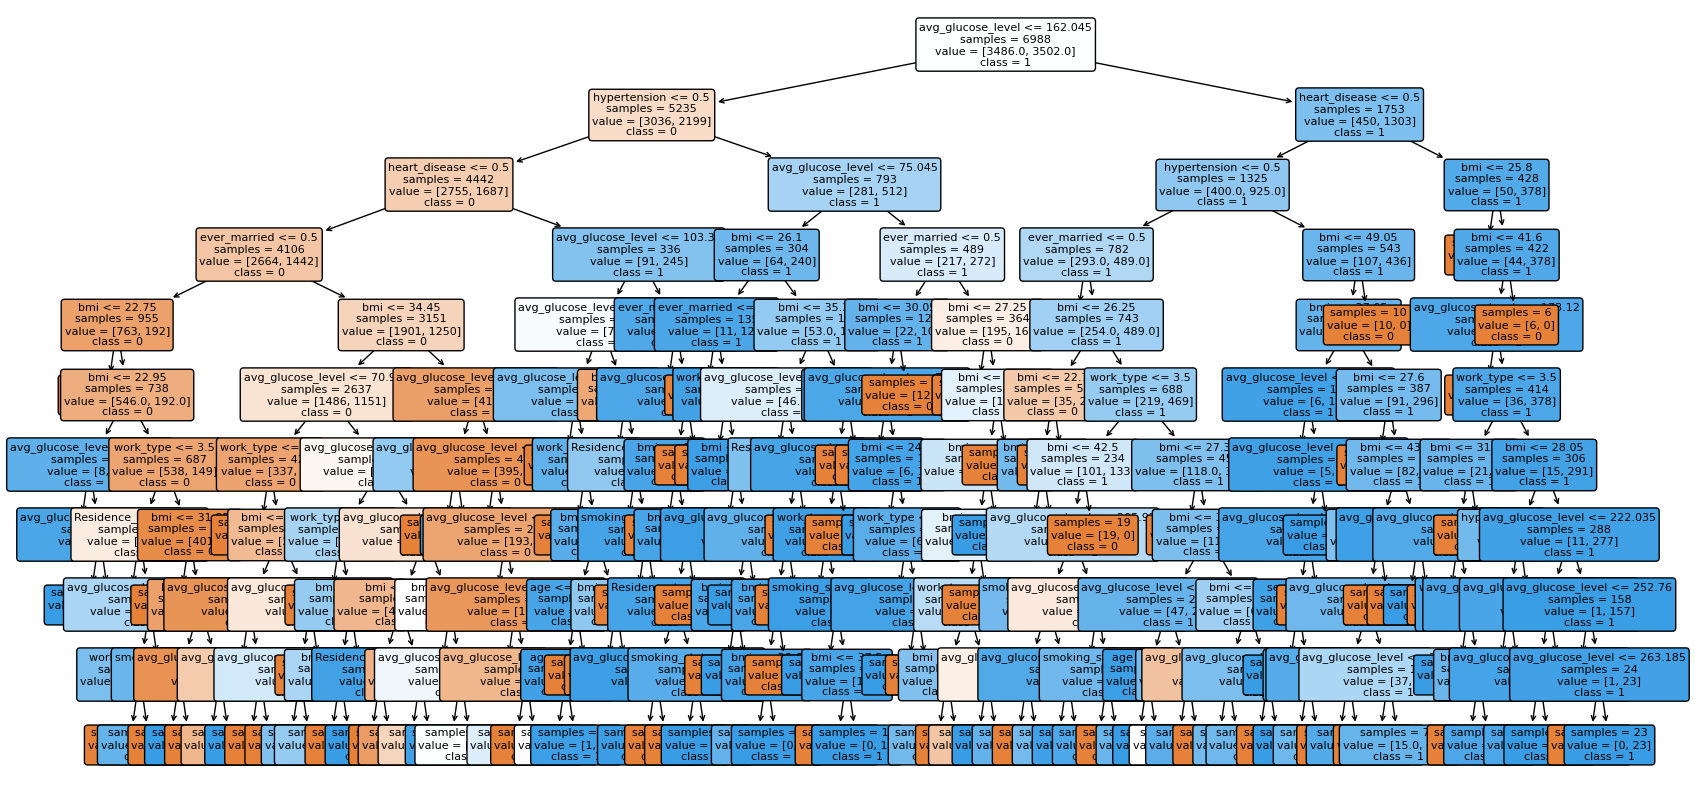

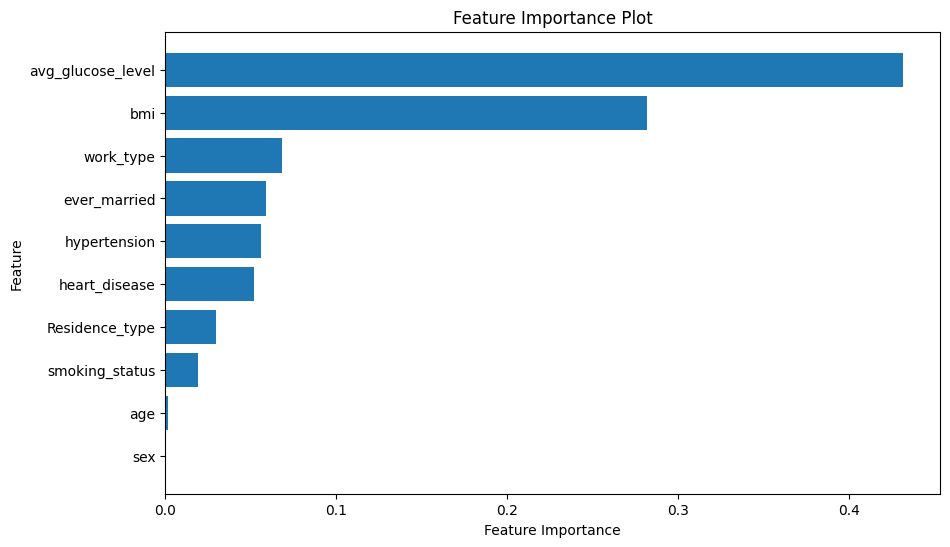

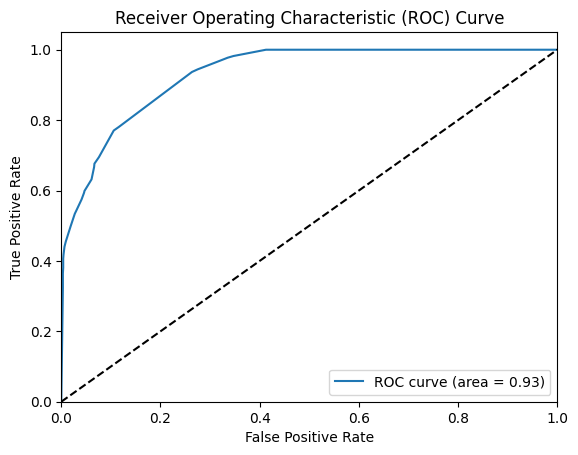

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9308917090923687
Accuracy for each fold: [0.81, 0.8333333333333334, 0.8066666666666666, 0.8133333333333334, 0.85, 0.7966666666666666, 0.8729096989966555, 0.8093645484949833, 0.8127090301003345, 0.7525083612040134]
Mean accuracy: 0.8157491638795987
95% confidence interval: (0.7927727322900605, 0.8387255954691369)


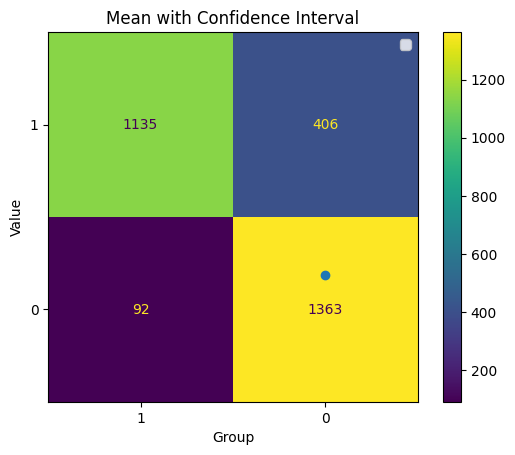

In [6]:
y_pred_prob_age_dt, y_test_age_dt, decision_tree = ML_algorithms.model_dt(df_age, df_original)
mean_accuracy_dt_age, confidence_interval_dt_age = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)


**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71      1541
           1       0.71      0.56      0.62      1455

    accuracy                           0.68      2996
   macro avg       0.68      0.67      0.67      2996
weighted avg       0.68      0.68      0.67      2996



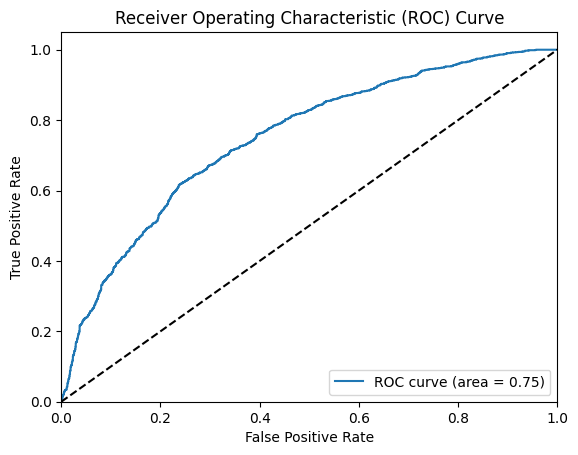

AUC Score: 0.7471365717356739


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.71, 0.69, 0.6866666666666666, 0.6166666666666667, 0.64, 0.6433333333333333, 0.6956521739130435, 0.7090301003344481, 0.6622073578595318, 0.6287625418060201]
Mean accuracy: 0.668231884057971
95% confidence interval: (0.6436299995748505, 0.6928337685410915)


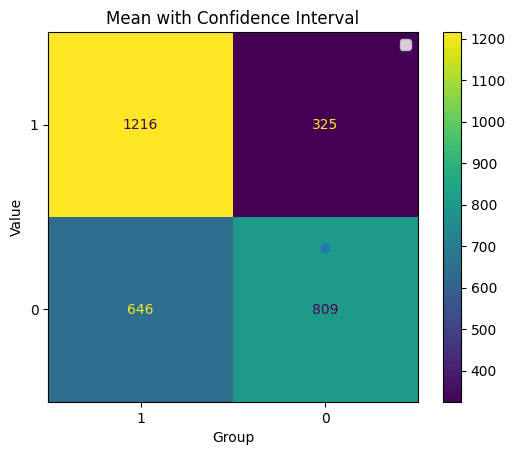

In [7]:
y_pred_prob_age_svm, y_test_age_svm, svm = ML_algorithms.model_svm(df_age, df_original)
mean_accuracy_svm_age, confidence_interval_svm_age = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_age, 'age')

Outliers found:


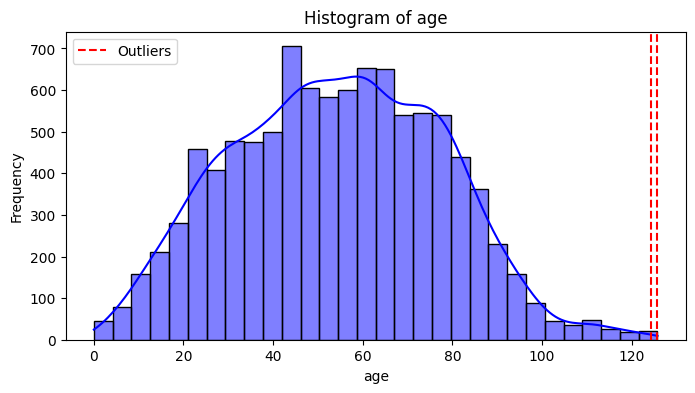

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1541
           1       0.77      0.94      0.85      1455

    accuracy                           0.83      2996
   macro avg       0.85      0.84      0.83      2996
weighted avg       0.85      0.83      0.83      2996

Node Labels:
 Annotation(0.60399, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6988\nvalue = [3486.0, 3502.0]\nclass = 1')


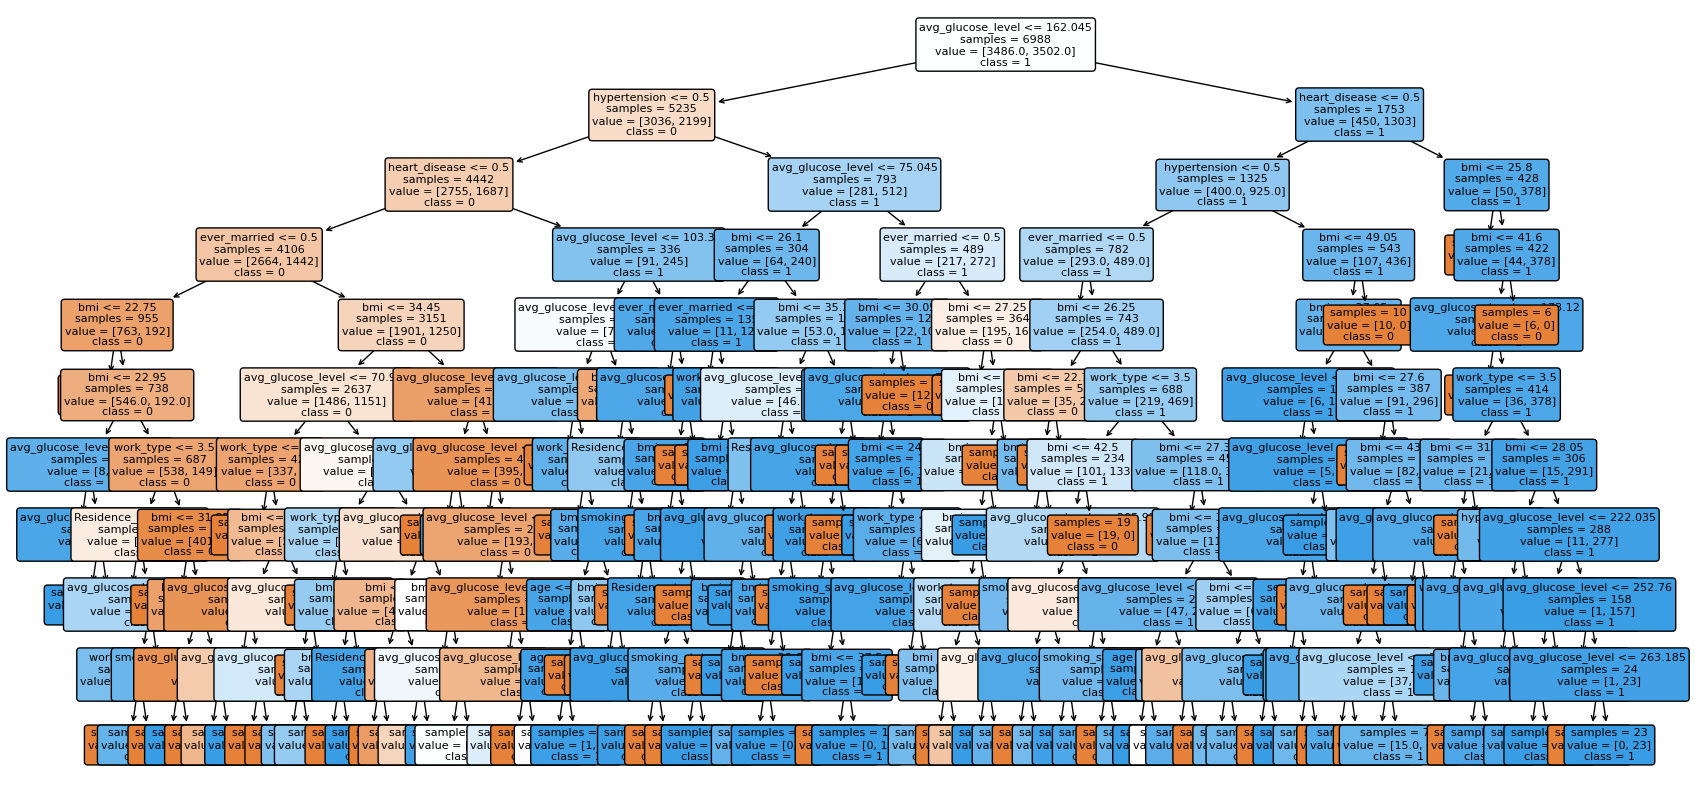

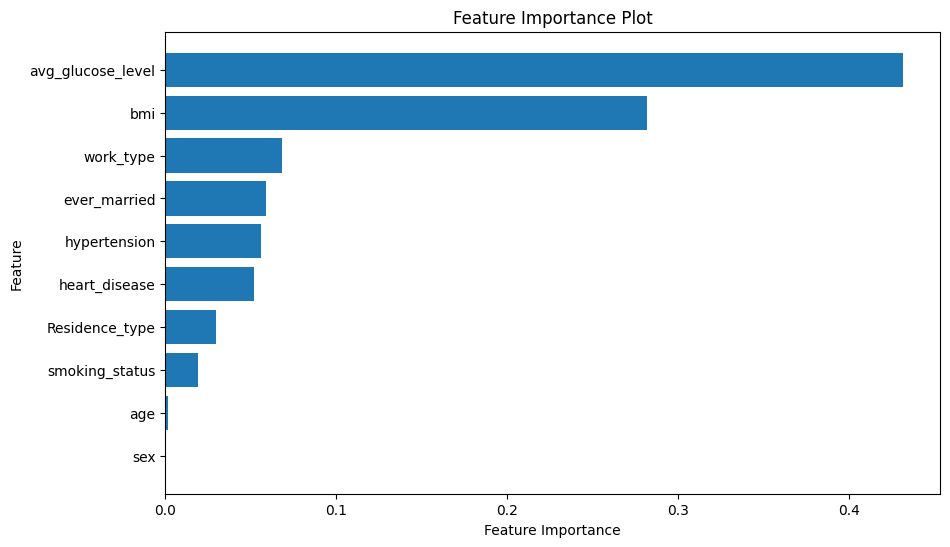

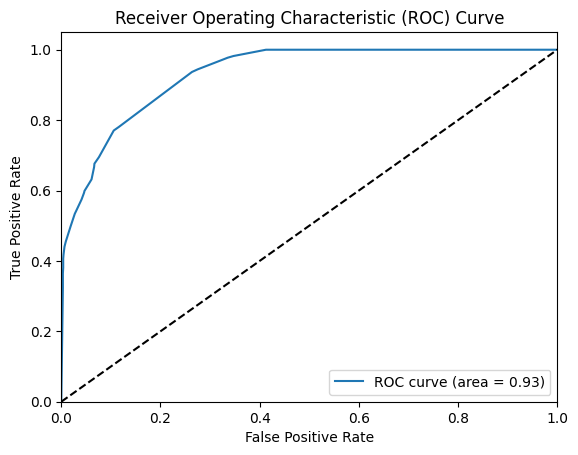

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9308917090923687
Accuracy for each fold: [0.78, 0.7833333333333333, 0.7866666666666666, 0.8466666666666667, 0.7933333333333333, 0.8666666666666667, 0.782608695652174, 0.7892976588628763, 0.7993311036789298, 0.7357859531772575]
Mean accuracy: 0.7963690078037905
95% confidence interval: (0.7703227787193262, 0.8224152368882548)


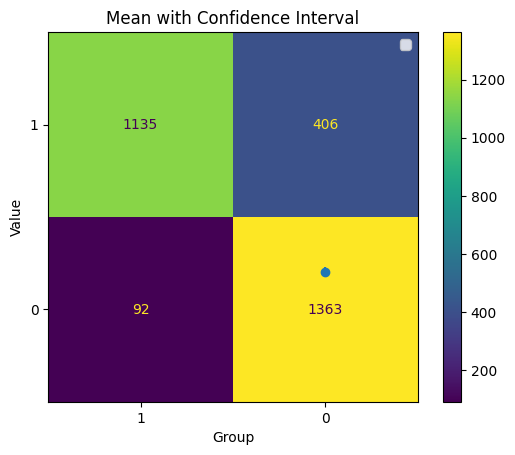

In [10]:
y_prob_dt_20_age, y_test_dt_20_age, decision_tree = ML_algorithms.model_dt(df_mean_age, df_original)
mean_accuracy_dt_20_age, confidence_interval_dt_20_age = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71      1541
           1       0.71      0.56      0.62      1455

    accuracy                           0.68      2996
   macro avg       0.68      0.67      0.67      2996
weighted avg       0.68      0.68      0.67      2996



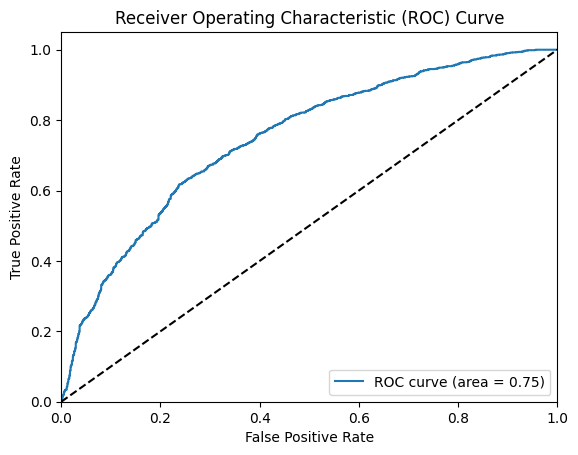

AUC Score: 0.7471459377250904


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6233333333333333, 0.64, 0.6333333333333333, 0.7166666666666667, 0.6733333333333333, 0.6366666666666667, 0.68561872909699, 0.6655518394648829, 0.7123745819397993, 0.6321070234113713]
Mean accuracy: 0.6618985507246377
95% confidence interval: (0.6373934709958619, 0.6864036304534135)


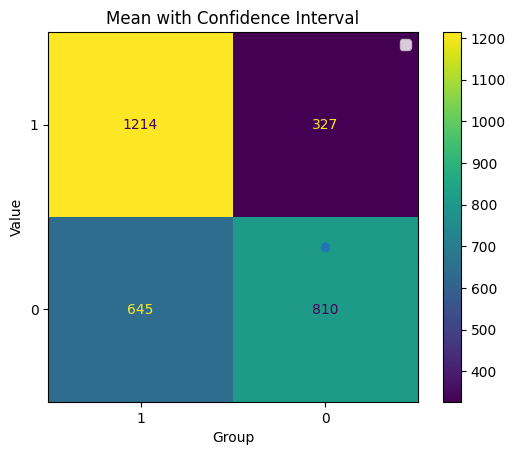

--------------------------------------


In [11]:
y_prob_svm_20_age, y_test_svm_20_age, svm = ML_algorithms.model_svm(df_mean_age, df_original)
mean_accuracy_svm_20_age, confidence_interval_svm_20_age = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_original.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 10)

Outliers found:


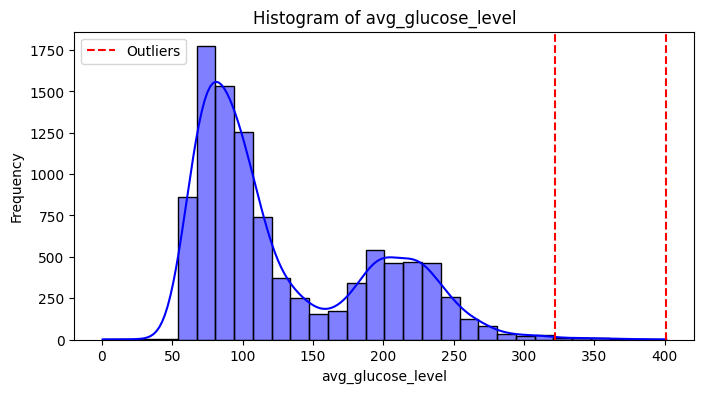

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1541
           1       0.83      0.83      0.83      1455

    accuracy                           0.84      2996
   macro avg       0.84      0.84      0.84      2996
weighted avg       0.84      0.84      0.84      2996

Node Labels:
 Annotation(0.565303, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3478, 3510]\nclass = 1')


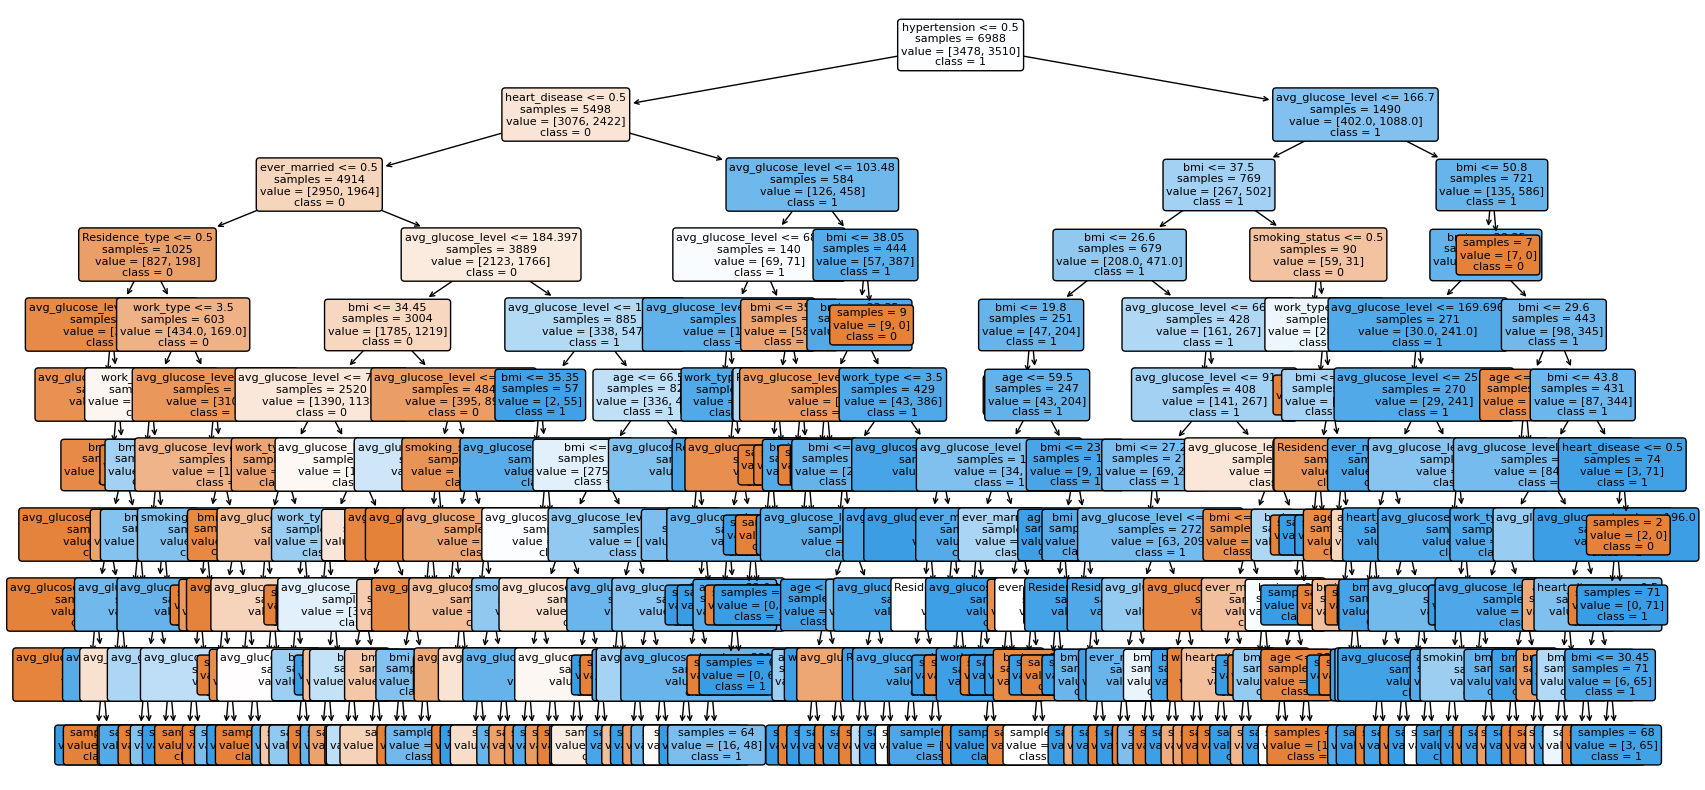

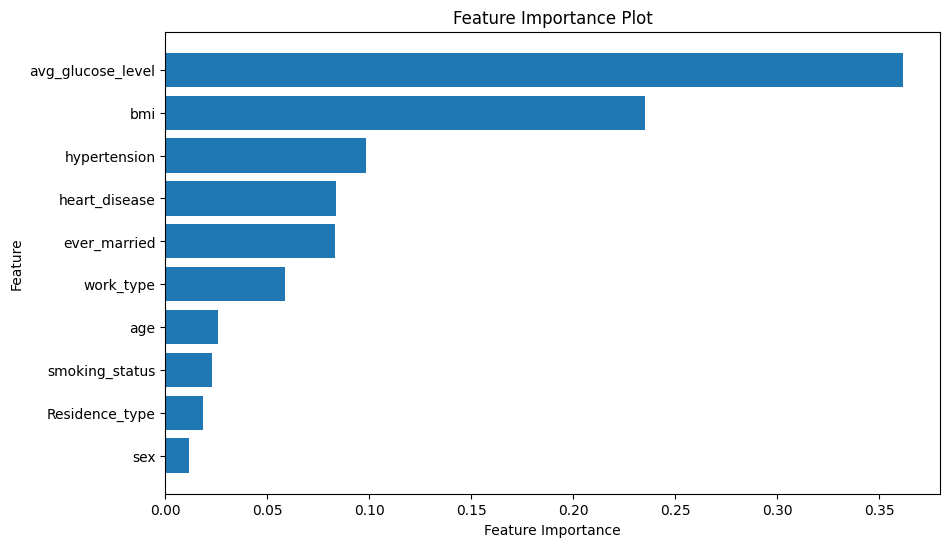

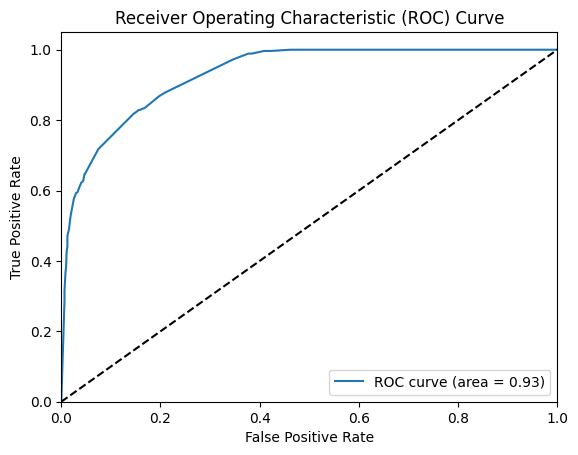

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9299341481744126
Accuracy for each fold: [0.7966666666666666, 0.8, 0.79, 0.8033333333333333, 0.79, 0.79, 0.8394648829431438, 0.822742474916388, 0.8260869565217391, 0.7859531772575251]
Mean accuracy: 0.8044247491638796
95% confidence interval: (0.7911933795391342, 0.8176561187886251)


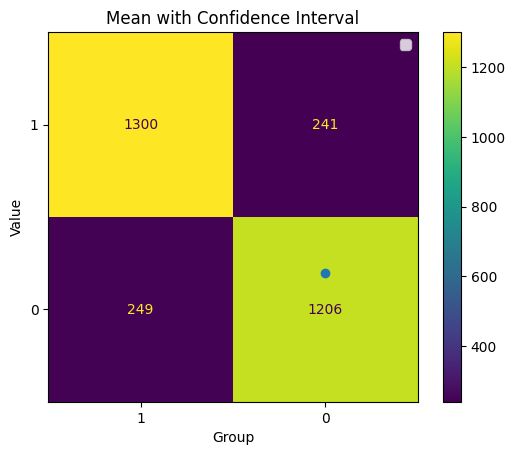

In [16]:
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df_glucose, df_original)
mean_accuracy_dt_glucose, confidence_interval_dt_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)


**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1541
           1       0.70      0.54      0.61      1455

    accuracy                           0.67      2996
   macro avg       0.67      0.66      0.66      2996
weighted avg       0.67      0.67      0.66      2996



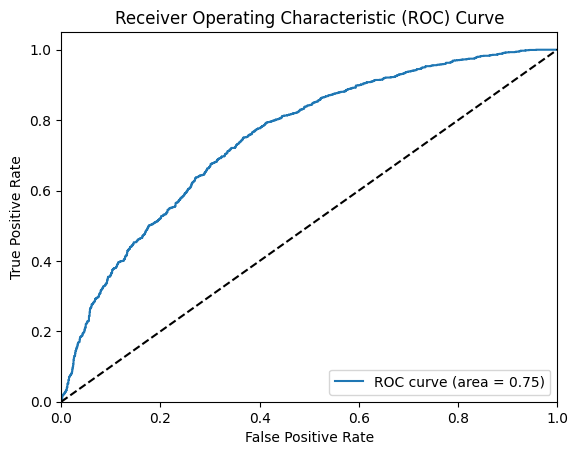

AUC Score: 0.750910173471504


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7, 0.6733333333333333, 0.63, 0.67, 0.7233333333333334, 0.6133333333333333, 0.6321070234113713, 0.6688963210702341, 0.6421404682274248, 0.7123745819397993]
Mean accuracy: 0.6665518394648828
95% confidence interval: (0.6399383586329911, 0.6931653202967746)


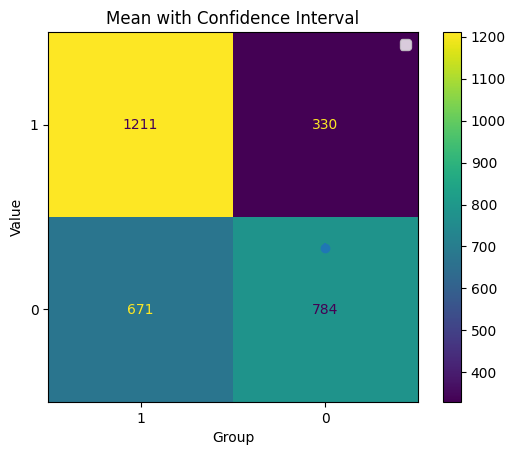

In [17]:
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df_glucose, df_original)
mean_accuracy_svm_glucose, confidence_interval_svm_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_glucose, 'avg_glucose_level')

Outliers found:


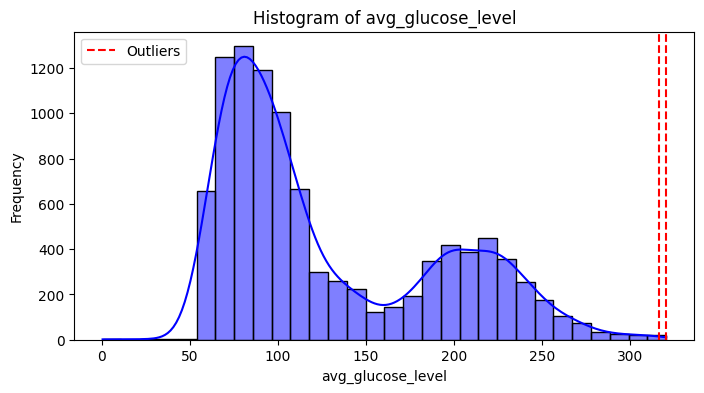

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1541
           1       0.83      0.87      0.85      1455

    accuracy                           0.85      2996
   macro avg       0.85      0.85      0.85      2996
weighted avg       0.85      0.85      0.85      2996

Node Labels:
 Annotation(0.533037, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3478, 3510]\nclass = 1')


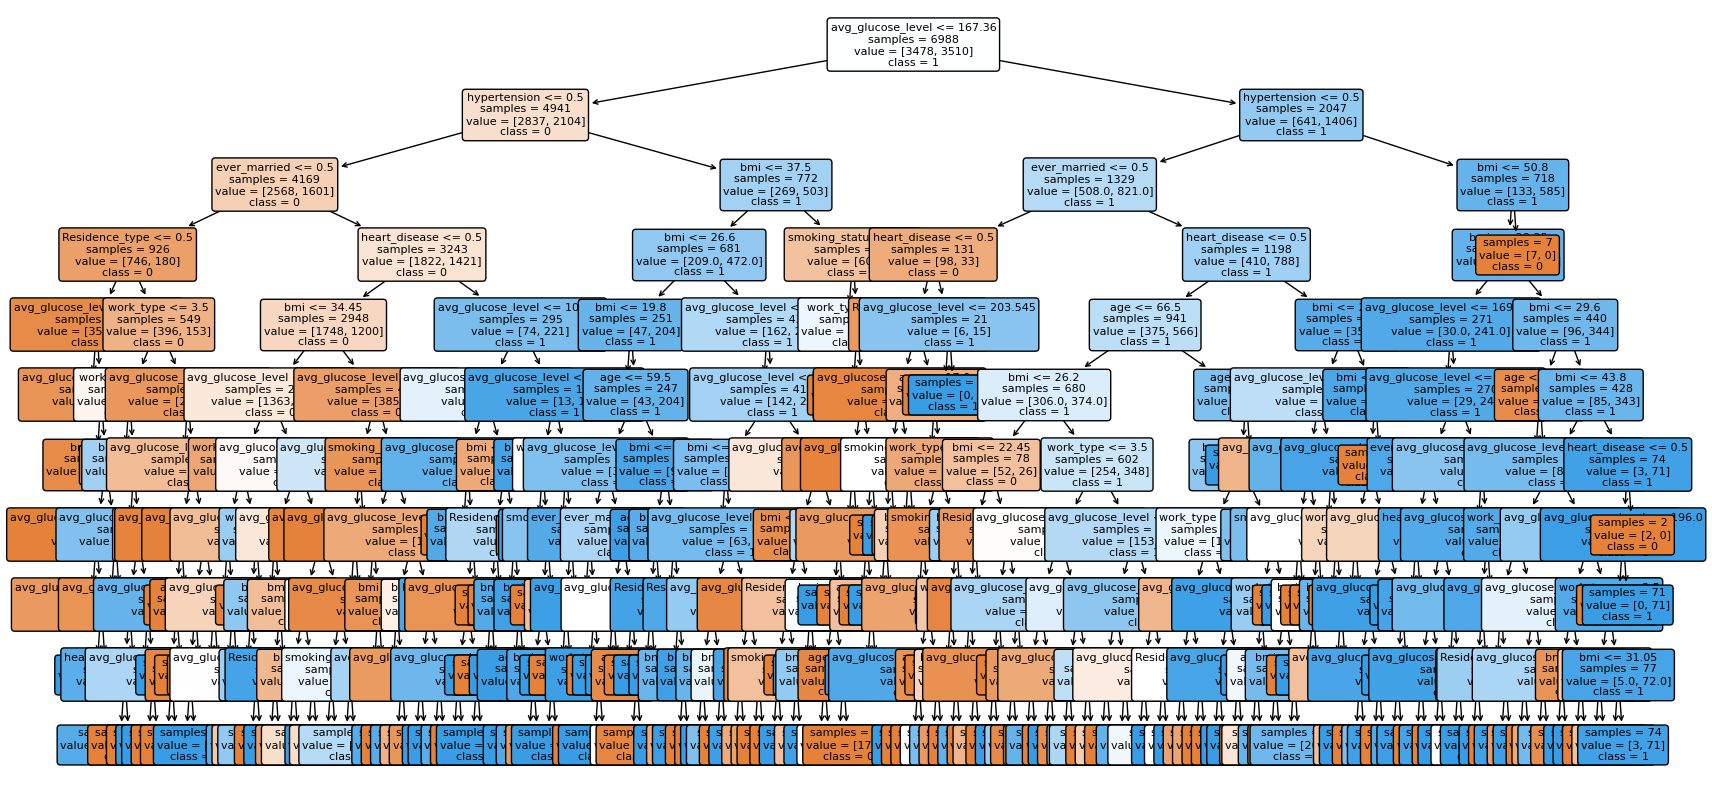

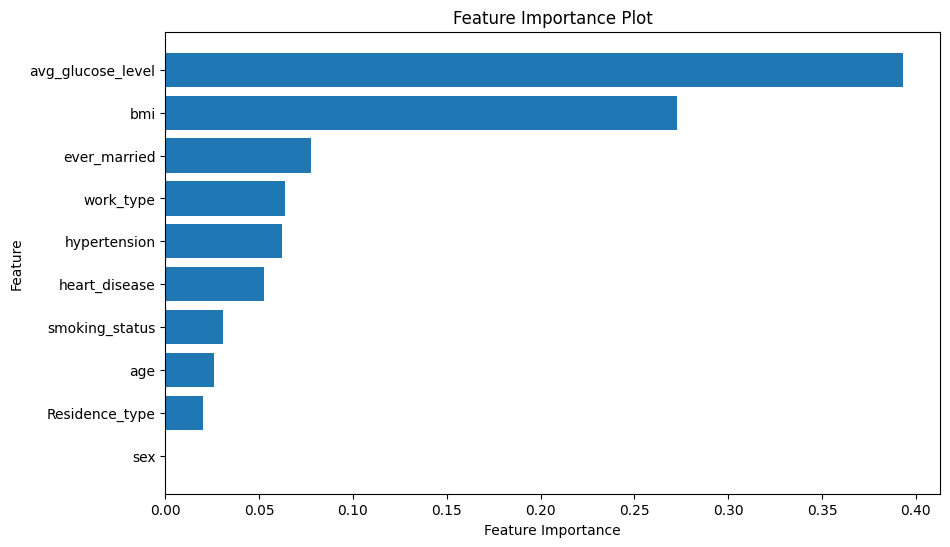

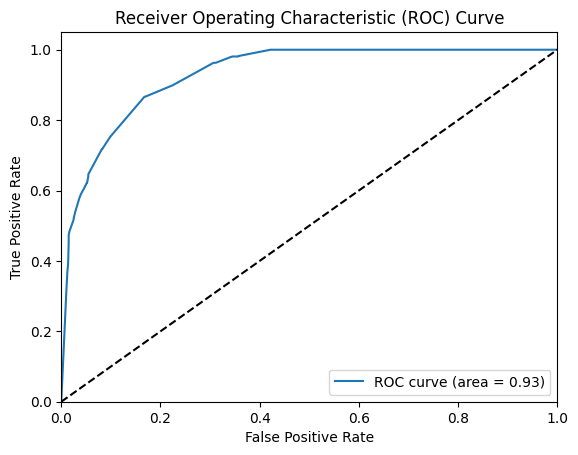

AUC Score: 0.9304983375368785


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.82, 0.8233333333333334, 0.7633333333333333, 0.8033333333333333, 0.7833333333333333, 0.82, 0.8193979933110368, 0.7959866220735786, 0.822742474916388, 0.7926421404682275]
Mean accuracy: 0.8044102564102564
95% confidence interval: (0.7898138943427994, 0.8190066184777135)


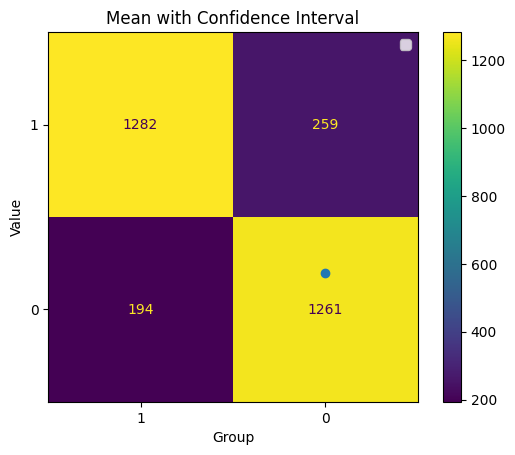

In [20]:
y_prob_dt_20_glucose, y_test_dt_20_glucose, decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_original)
mean_accuracy_dt_20_glucose, confidence_interval_dt_20_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1541
           1       0.70      0.56      0.62      1455

    accuracy                           0.67      2996
   macro avg       0.68      0.67      0.66      2996
weighted avg       0.68      0.67      0.67      2996



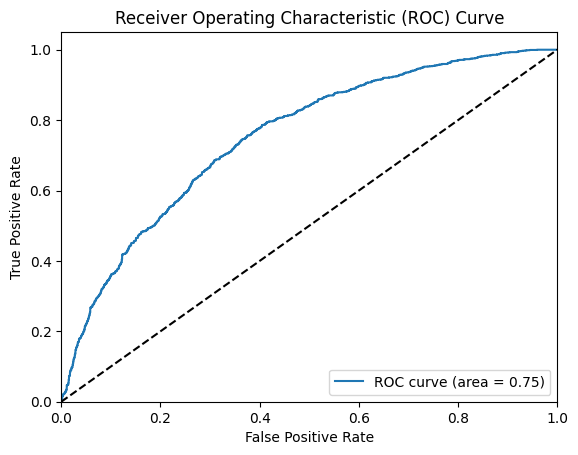

AUC Score: 0.7509668154074985


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6833333333333333, 0.6566666666666666, 0.6566666666666666, 0.6133333333333333, 0.6466666666666666, 0.69, 0.6789297658862876, 0.7090301003344481, 0.6722408026755853, 0.68561872909699]
Mean accuracy: 0.6692486064659977
95% confidence interval: (0.6499718381542777, 0.6885253747777177)


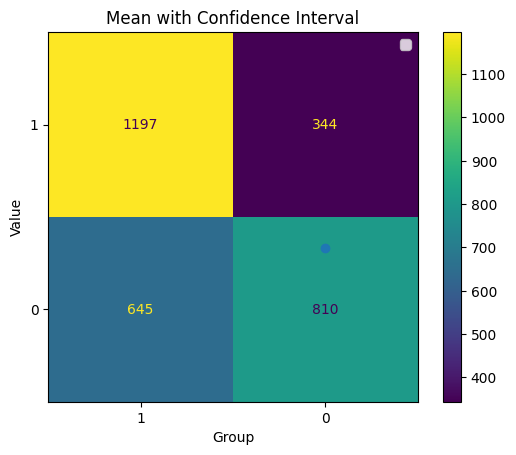

--------------------------------------


In [21]:
y_prob_svm_20_glucose, y_test_svm_20_glucose, svm = ML_algorithms.model_svm(df_mean_glucose, df_original)
mean_accuracy_svm_20_glucose, confidence_interval_svm_20_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## bmi

In [22]:
df = df_original.copy()

--------------------------------------
Outliers found:


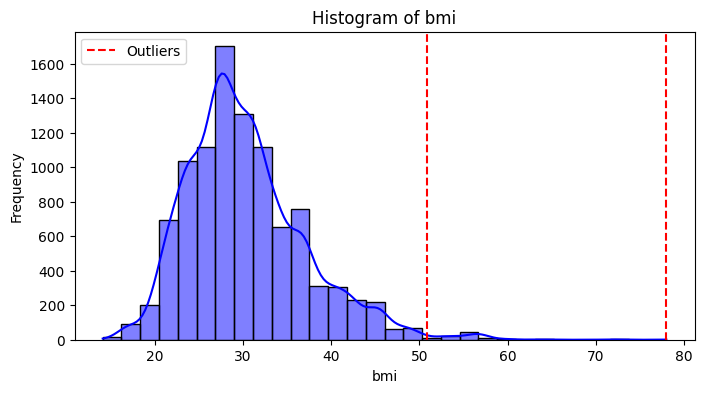

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 10)

Outliers found:


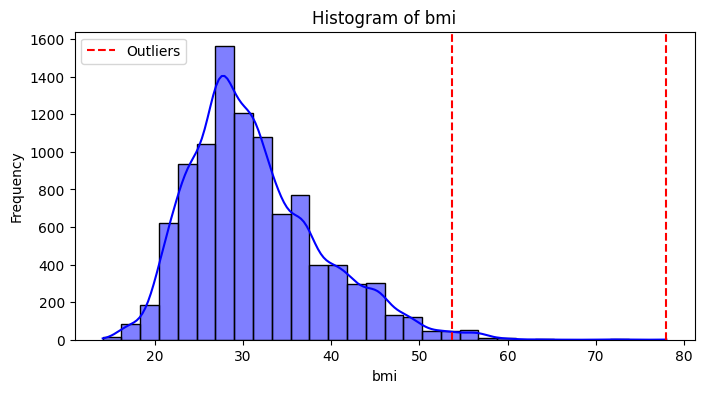

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1541
           1       0.84      0.90      0.87      1455

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.87      0.87      0.87      2996

Node Labels:
 Annotation(0.605406, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3476, 3512]\nclass = 1')


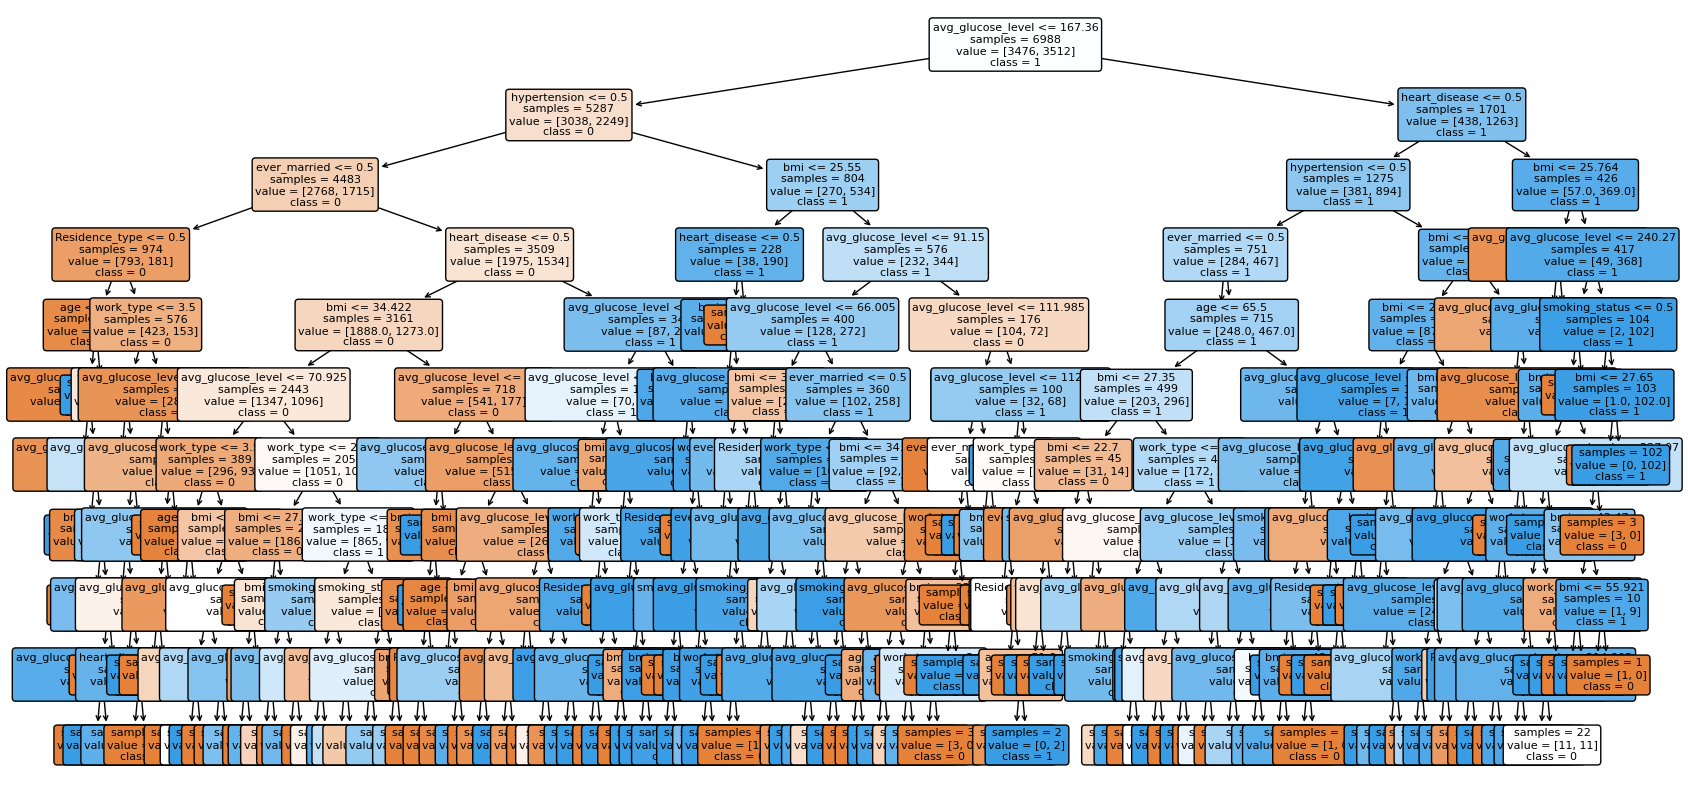

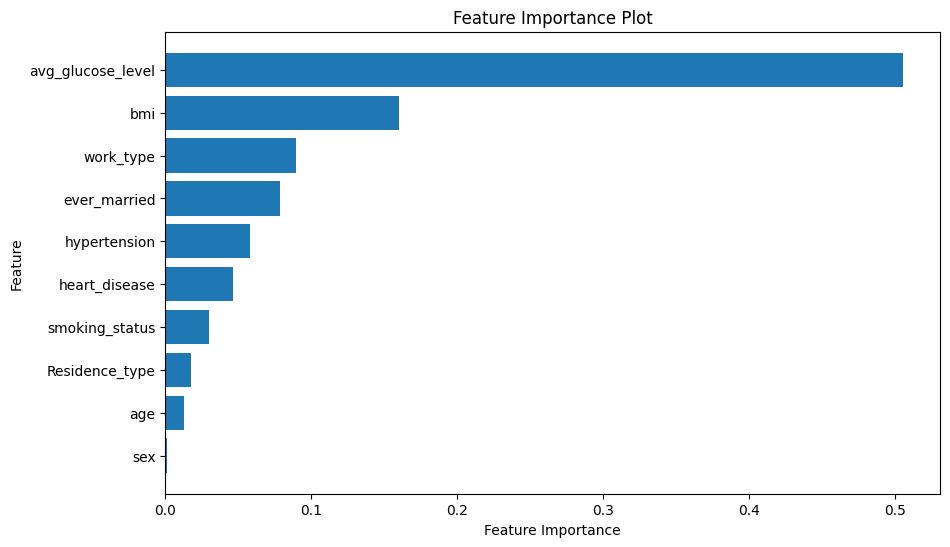

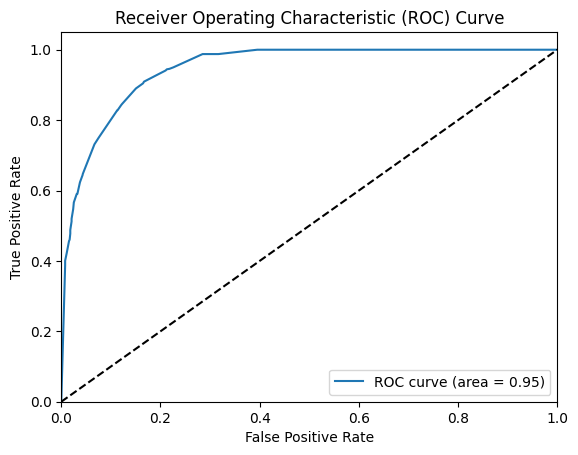

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9461897148056223
Accuracy for each fold: [0.82, 0.83, 0.7933333333333333, 0.7966666666666666, 0.79, 0.8233333333333334, 0.802675585284281, 0.7926421404682275, 0.7959866220735786, 0.8394648829431438]
Mean accuracy: 0.8084102564102563
95% confidence interval: (0.7955083409230982, 0.8213121718974145)


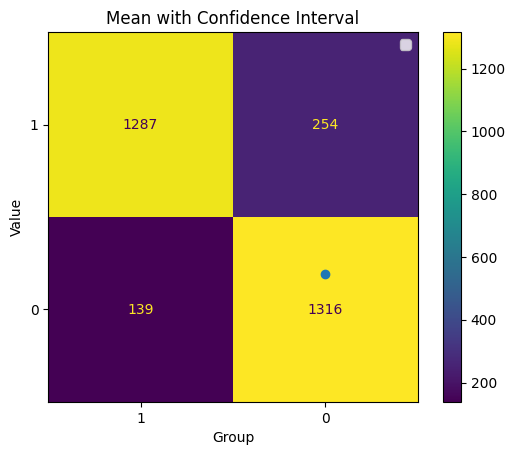

In [26]:
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df_bmi, df_original)
mean_accuracy_dt_bmi, confidence_interval_dt_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1541
           1       0.72      0.59      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.69      0.68      2996
weighted avg       0.69      0.69      0.69      2996



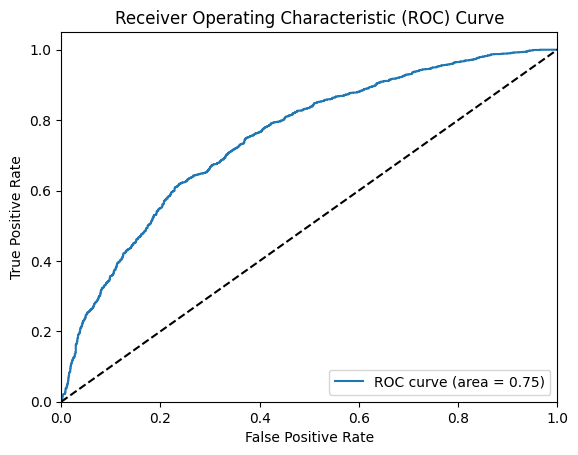

AUC Score: 0.7505792418454568


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6333333333333333, 0.6933333333333334, 0.6733333333333333, 0.6566666666666666, 0.7133333333333334, 0.64, 0.68561872909699, 0.6555183946488294, 0.6889632107023411, 0.6789297658862876]
Mean accuracy: 0.6719030100334449
95% confidence interval: (0.6538807687141315, 0.6899252513527583)


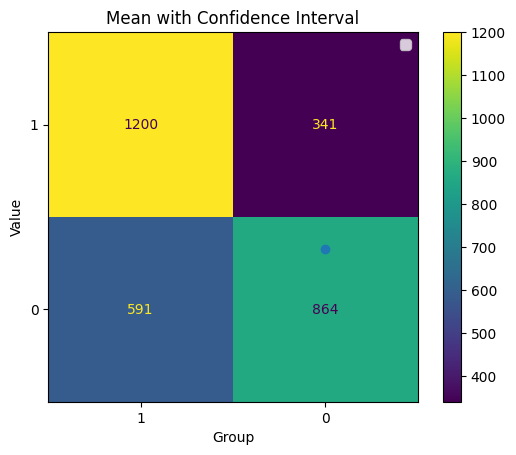

In [27]:
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = ML_algorithms.model_svm(df_bmi, df_original)
mean_accuracy_svm_bmi, confidence_interval_svm_bmi = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_bmi, 'bmi')

Outliers found:


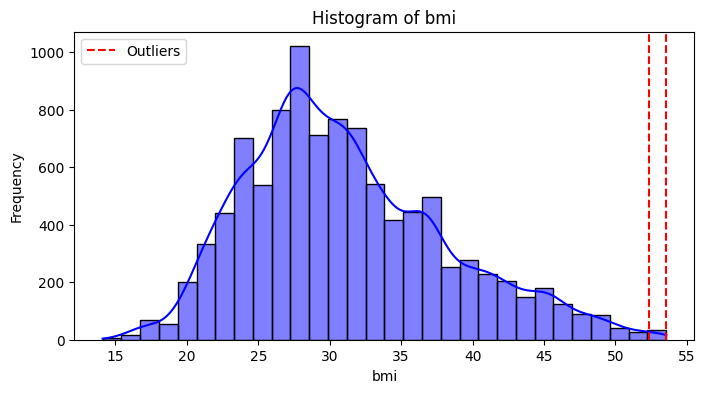

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1541
           1       0.84      0.89      0.86      1455

    accuracy                           0.86      2996
   macro avg       0.86      0.86      0.86      2996
weighted avg       0.87      0.86      0.86      2996

Node Labels:
 Annotation(0.600226, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3476, 3512]\nclass = 1')


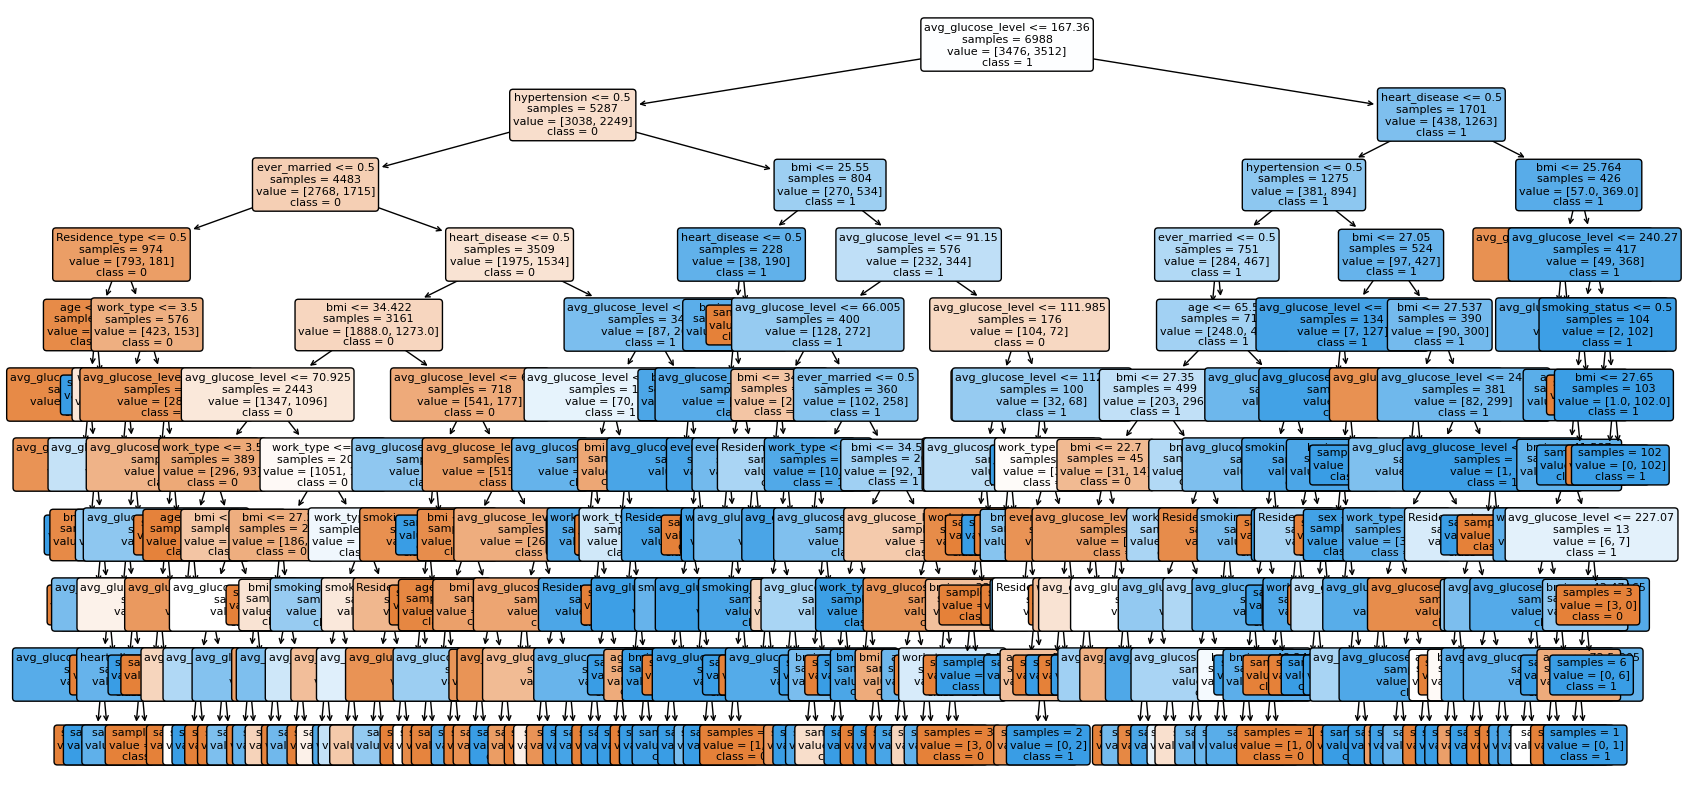

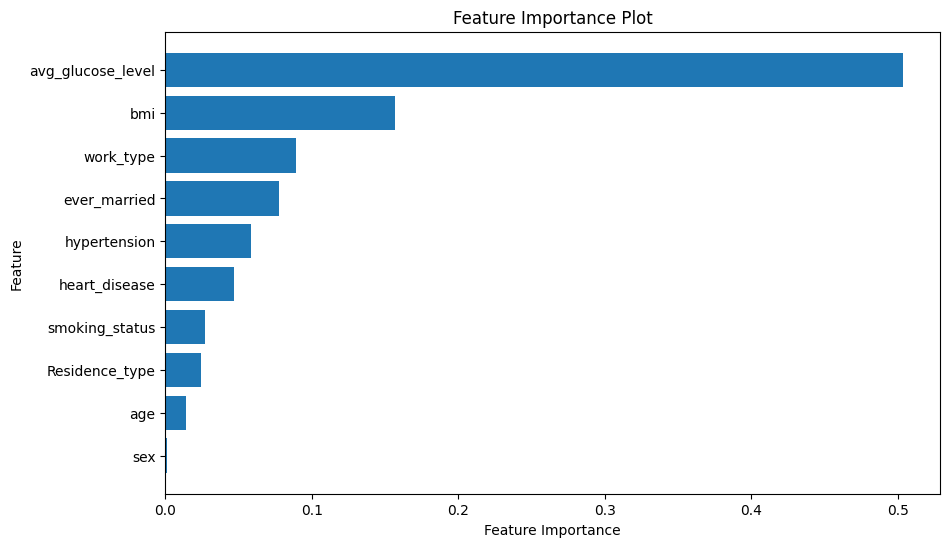

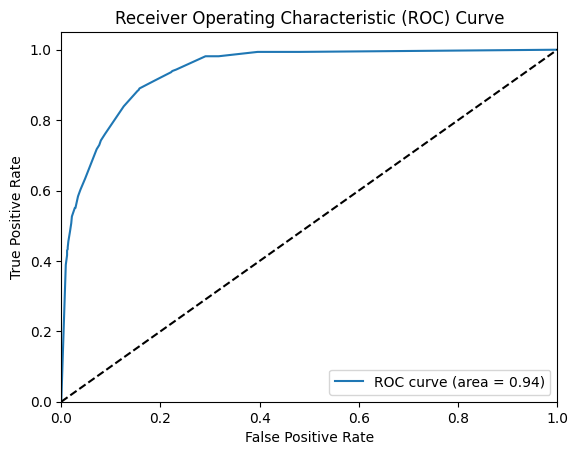

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9391536267564018
Accuracy for each fold: [0.7933333333333333, 0.7733333333333333, 0.83, 0.78, 0.84, 0.81, 0.8127090301003345, 0.822742474916388, 0.8193979933110368, 0.7591973244147158]
Mean accuracy: 0.8040713489409141
95% confidence interval: (0.7851302541610043, 0.8230124437208239)


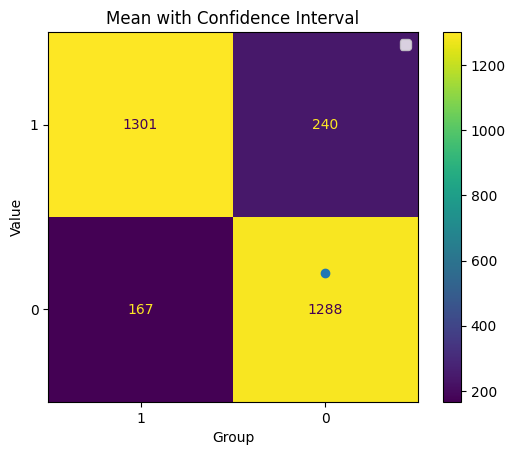

In [30]:
y_prob_dt_20_bmi, y_test_dt_20_bmi, decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_original)
mean_accuracy_dt_20_bmi, confidence_interval_dt_20_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1541
           1       0.72      0.59      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.69      0.68      2996
weighted avg       0.69      0.69      0.69      2996



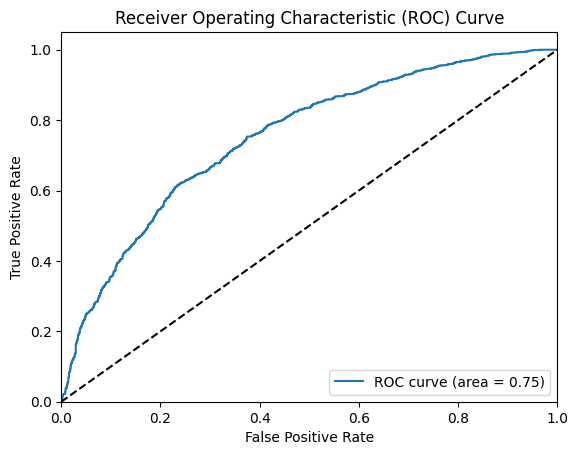

AUC Score: 0.7504365220067302


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.68, 0.6433333333333333, 0.7066666666666667, 0.64, 0.6933333333333334, 0.6533333333333333, 0.6822742474916388, 0.6956521739130435, 0.6521739130434783, 0.6220735785953178]
Mean accuracy: 0.6668840579710145
95% confidence interval: (0.6466449642350064, 0.6871231517070225)


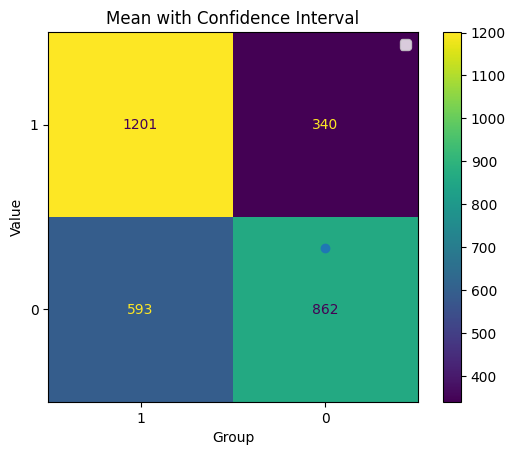

--------------------------------------


In [31]:
y_prob_svm_20_bmi, y_test_svm_20_bmi, svm = ML_algorithms.model_svm(df_mean_bmi, df_original)
mean_accuracy_svm_20_bmi, confidence_interval_svm_20_bmi = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## Categorical

In [32]:
df = df_original.copy()

Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


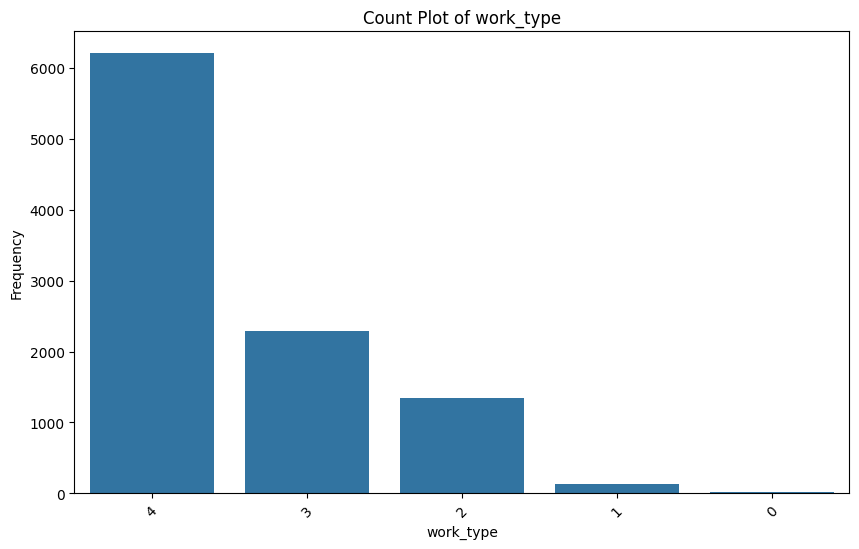

In [33]:
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 10, df)

Valore meno frequente:  0


Value counts:
work_type
4    5575
3    2073
2    1204
0    1018
1     114
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 0, 1]
Outliers found:


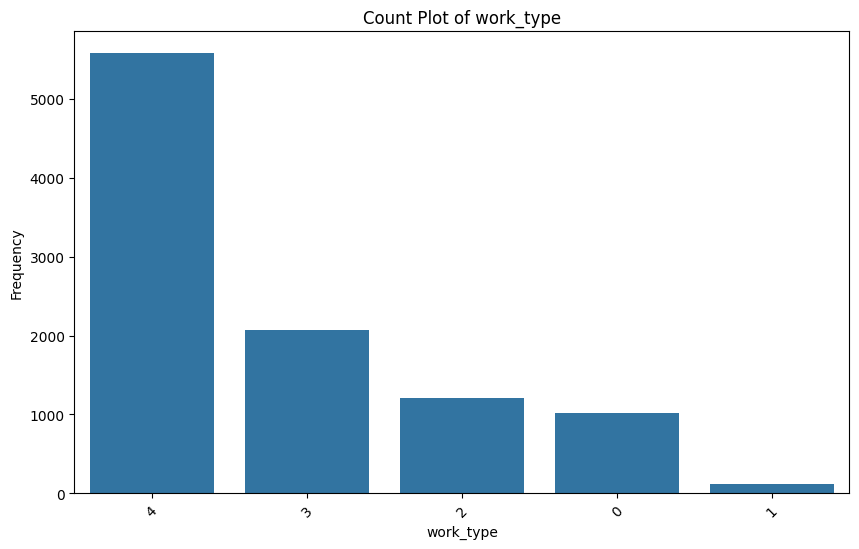

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      1541
           1       0.77      0.96      0.86      1455

    accuracy                           0.84      2996
   macro avg       0.86      0.85      0.84      2996
weighted avg       0.86      0.84      0.84      2996

Node Labels:
 Annotation(0.609788, 0.954545, 'avg_glucose_level <= 170.64\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


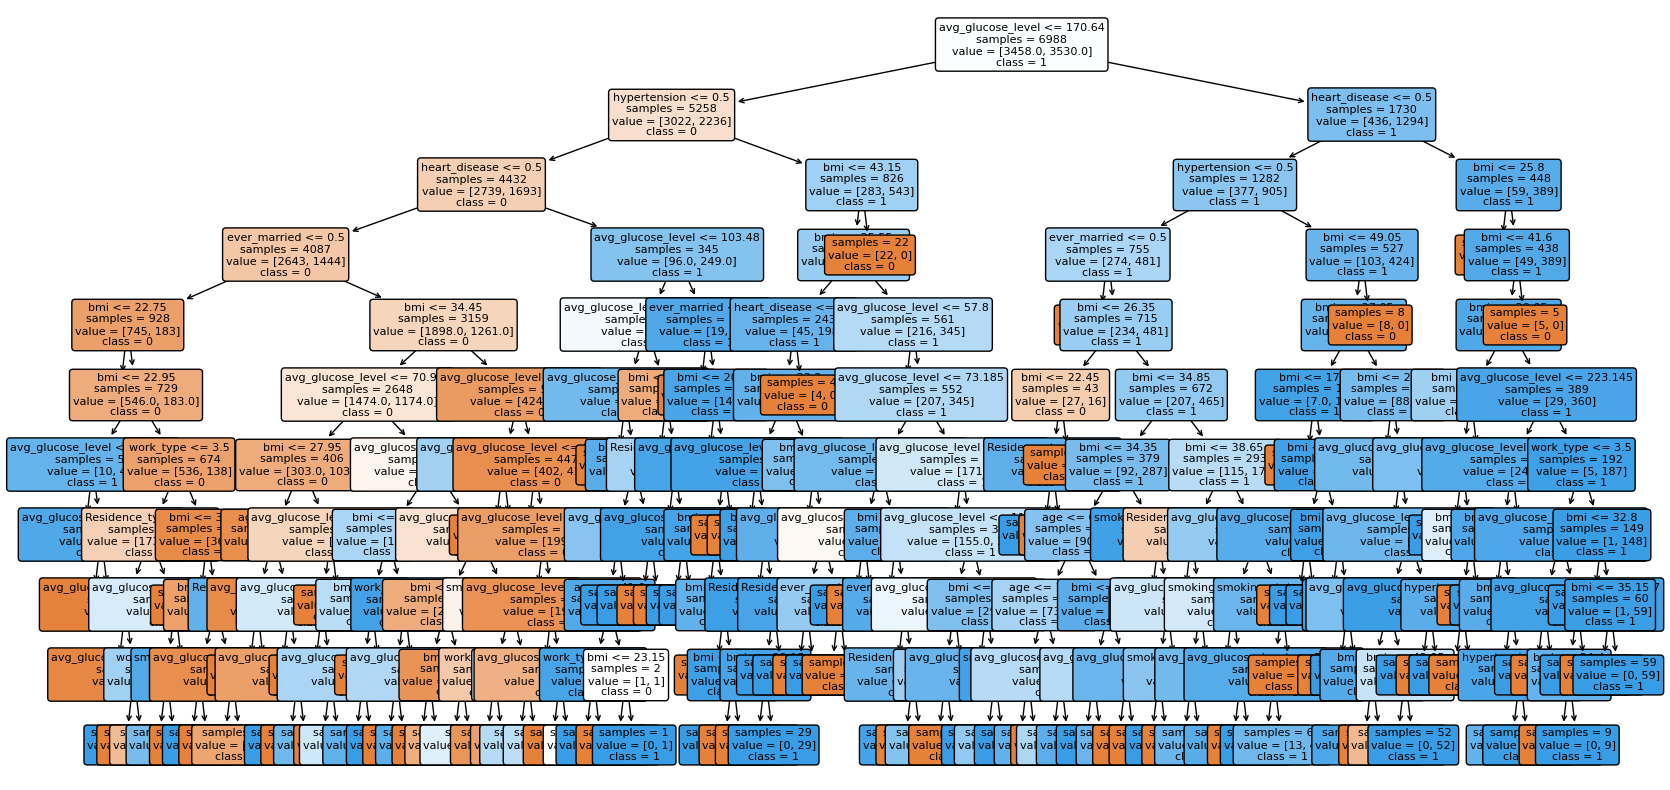

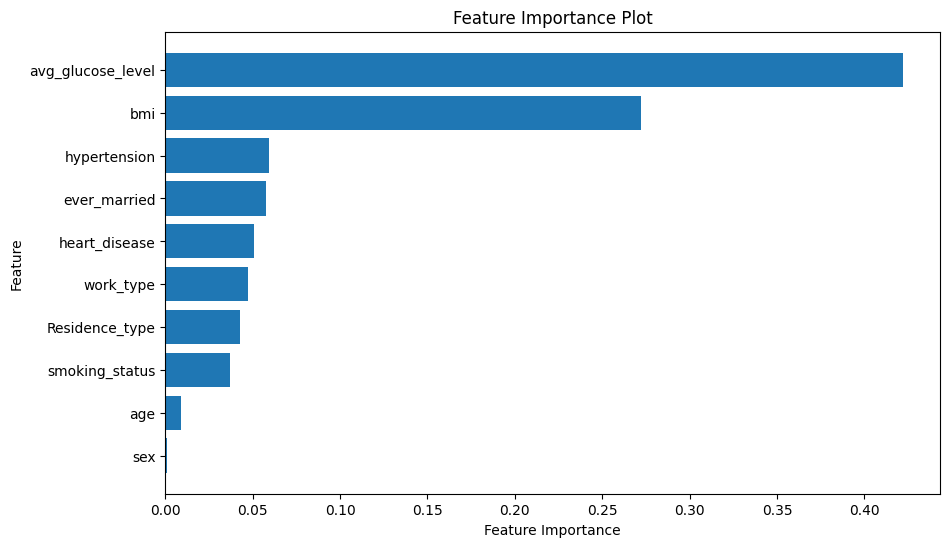

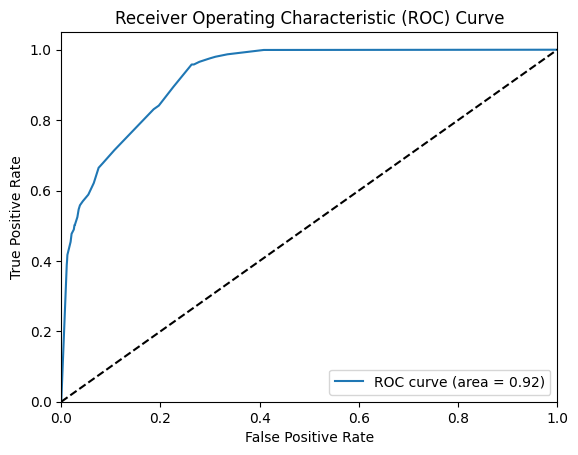

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9236460012800186
Accuracy for each fold: [0.8133333333333334, 0.8133333333333334, 0.7833333333333333, 0.7766666666666666, 0.7933333333333333, 0.79, 0.8160535117056856, 0.7759197324414716, 0.8193979933110368, 0.7892976588628763]
Mean accuracy: 0.797066889632107
95% confidence interval: (0.7849912459100835, 0.8091425333541306)


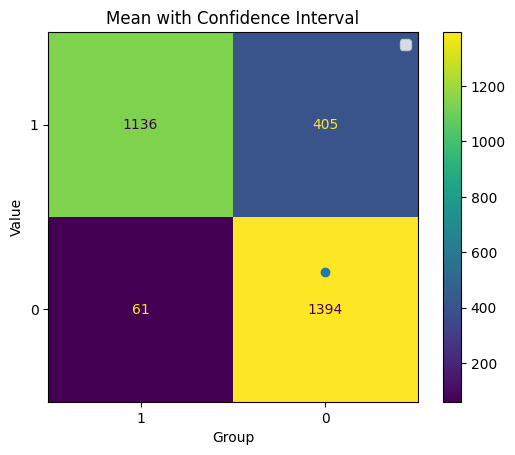

In [36]:
y_pred_prob_categorical_dt, y_test_categorical_dt, decision_tree = ML_algorithms.model_dt(df_categorical, df_original)
mean_accuracy_dt_categorical, confidence_interval_dt_categorical = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1541
           1       0.72      0.58      0.64      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



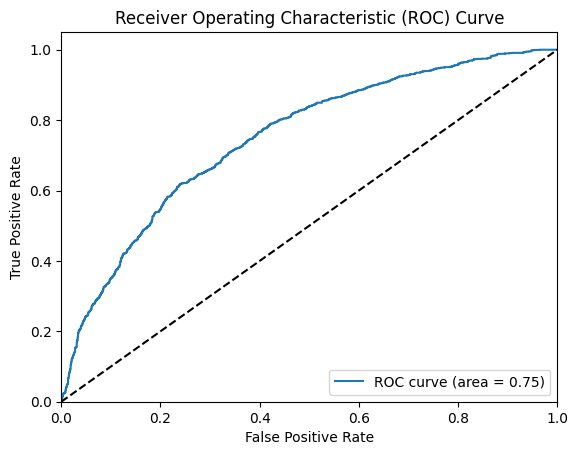

AUC Score: 0.7488313698205522


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.67, 0.6733333333333333, 0.7166666666666667, 0.6466666666666666, 0.69, 0.6233333333333333, 0.6889632107023411, 0.7157190635451505, 0.6254180602006689, 0.6454849498327759]
Mean accuracy: 0.6695585284280936
95% confidence interval: (0.6453024840789167, 0.6938145727772705)


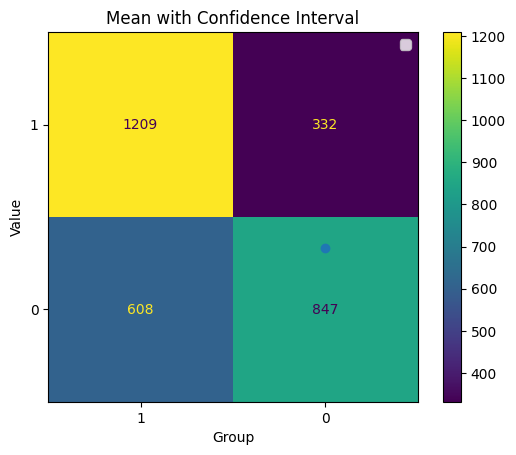

--------------------------------------


In [37]:
y_pred_prob_categorical_svm, y_test_categorical_svm, svm = ML_algorithms.model_svm(df_categorical, df_original)
mean_accuracy_svm_categorical, confidence_interval_svm_categorical = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

print('--------------------------------------')

## Conclusion

### ROC Curve

**Decision Tree**

Decision Tree


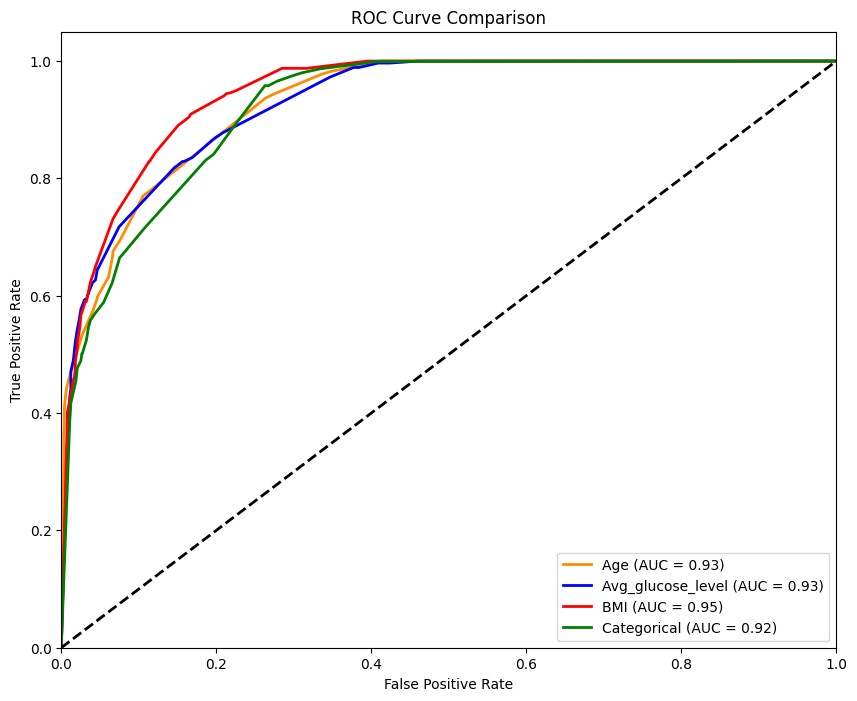

In [38]:
roc_results = [
    (y_pred_prob_age_dt, y_test_age_dt, 'Age'),
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_categorical_dt, y_test_categorical_dt, 'Categorical')
]

print('Decision Tree')
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Decision Tree - substitution of outliers**

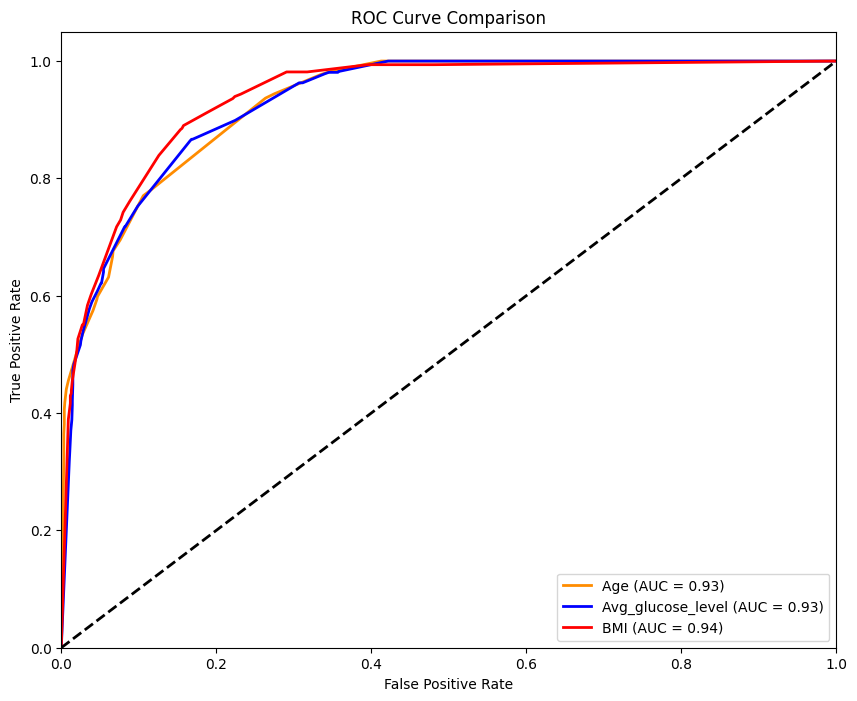

In [39]:
roc_results = [
    (y_prob_dt_20_age, y_test_dt_20_age, 'Age'),
    (y_prob_dt_20_glucose, y_test_dt_20_glucose, 'Avg_glucose_level'),
    (y_prob_dt_20_bmi, y_test_dt_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine**

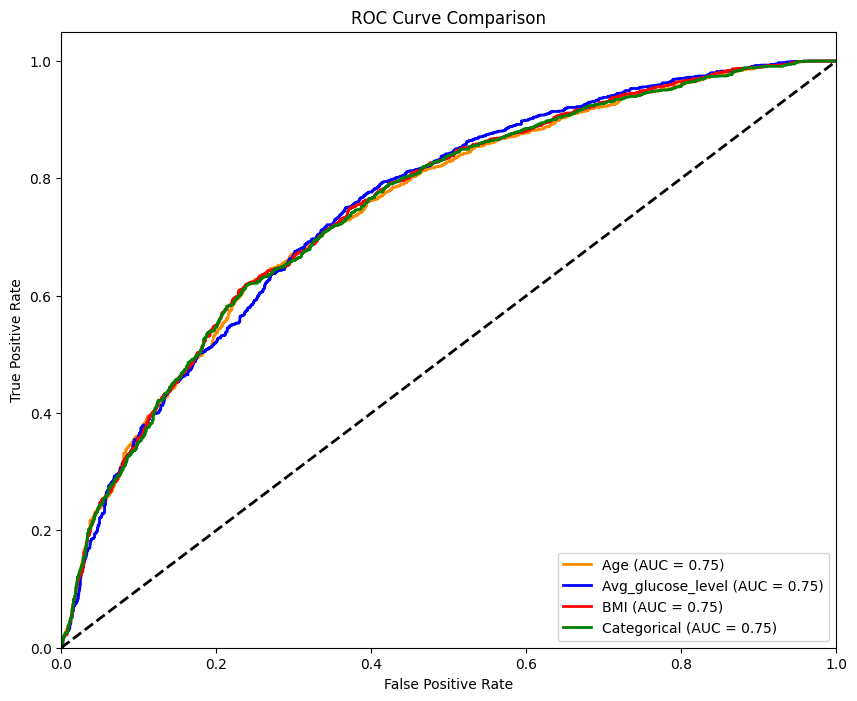

In [40]:
roc_results = [
    (y_pred_prob_age_svm, y_test_age_svm, 'Age'),
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_categorical_svm, y_test_categorical_svm, 'Categorical')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine - substitution of outliers**

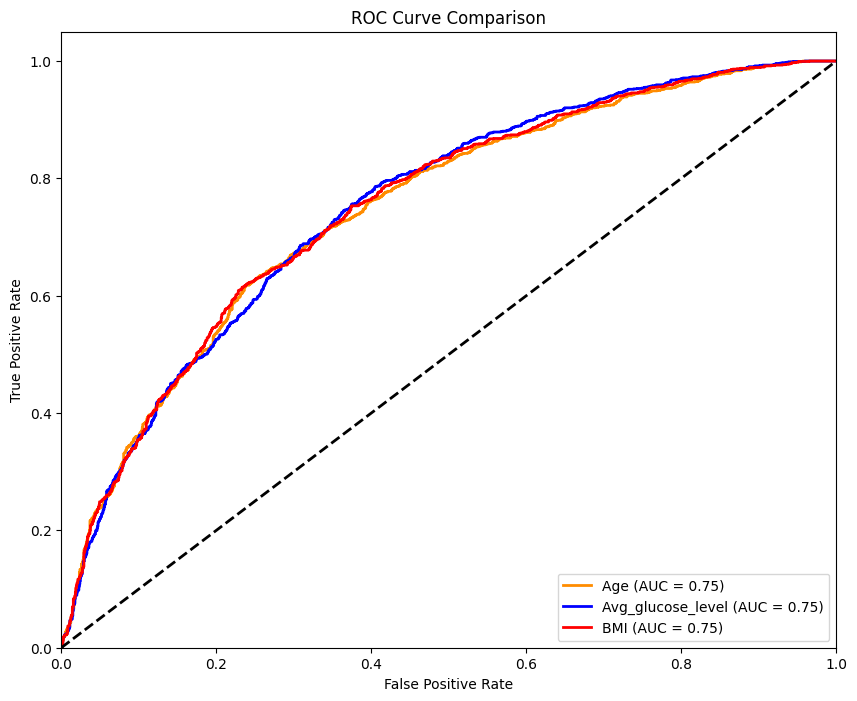

In [41]:
roc_results = [
    (y_prob_svm_20_age, y_test_svm_20_age, 'Age'),
    (y_prob_svm_20_glucose, y_test_svm_20_glucose, 'Avg_glucose_level'),
    (y_prob_svm_20_bmi, y_test_svm_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Confidence Interval 

**Decision Tree**

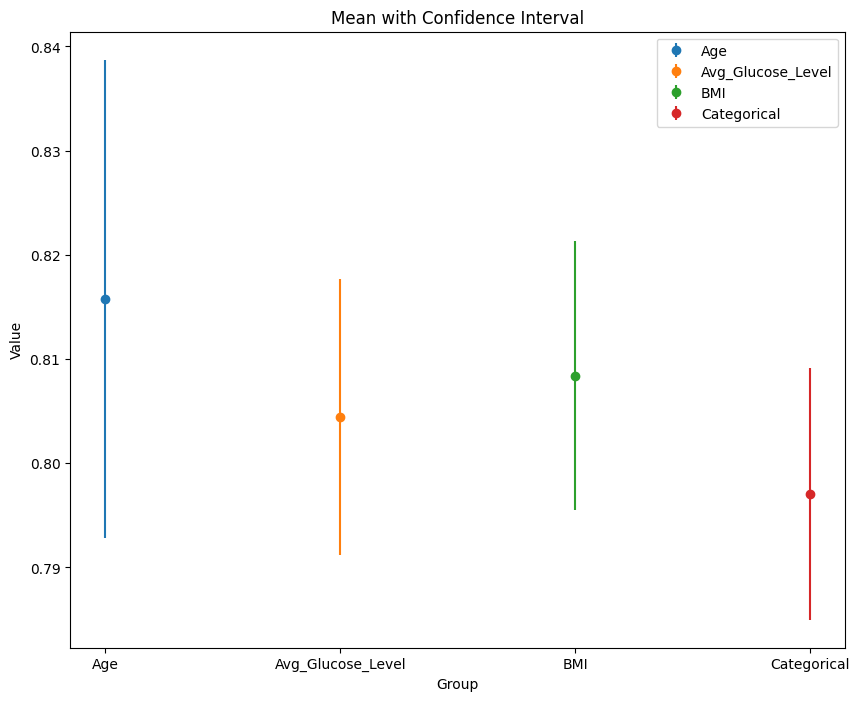

In [42]:
model_results = [
    ('Age', mean_accuracy_dt_age, confidence_interval_dt_age),
    ('Avg_Glucose_Level', mean_accuracy_dt_glucose, confidence_interval_dt_glucose),
    ('BMI', mean_accuracy_dt_bmi, confidence_interval_dt_bmi),
    ('Categorical', mean_accuracy_dt_categorical, confidence_interval_dt_categorical)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Decision Tree - substitution of outliers**

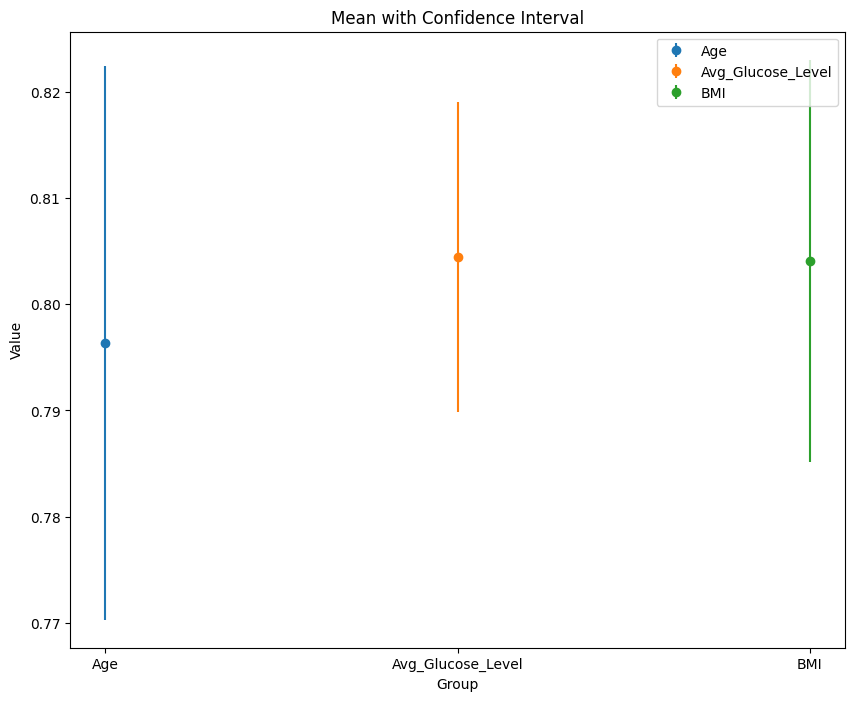

In [43]:
model_results = [
    ('Age', mean_accuracy_dt_20_age, confidence_interval_dt_20_age),
    ('Avg_Glucose_Level', mean_accuracy_dt_20_glucose, confidence_interval_dt_20_glucose),
    ('BMI', mean_accuracy_dt_20_bmi, confidence_interval_dt_20_bmi)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Support Vector Machine**

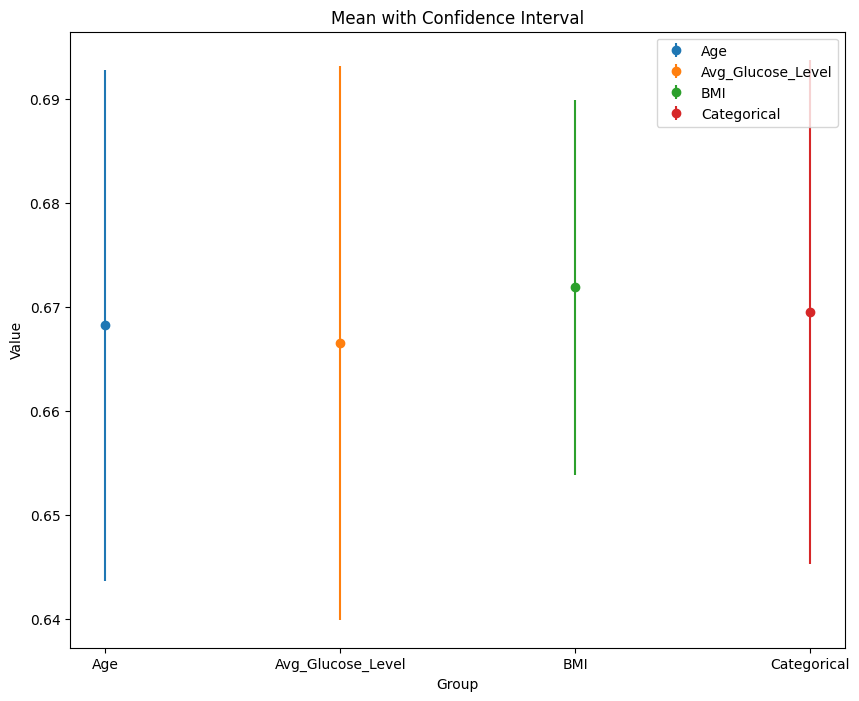

In [44]:
model_results = [
    ('Age', mean_accuracy_svm_age, confidence_interval_svm_age),
    ('Avg_Glucose_Level', mean_accuracy_svm_glucose, confidence_interval_svm_glucose),
    ('BMI', mean_accuracy_svm_bmi, confidence_interval_svm_bmi),
    ('Categorical', mean_accuracy_svm_categorical, confidence_interval_svm_categorical)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Support Vector Machine - substitution of outliers**

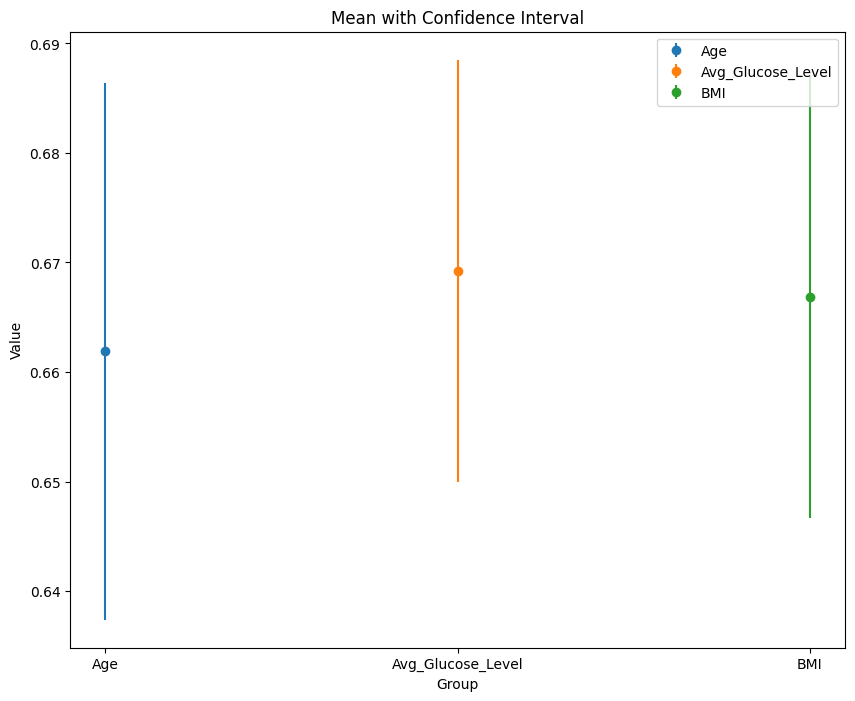

In [45]:
model_results = [
    ('Age', mean_accuracy_svm_20_age, confidence_interval_svm_20_age),
    ('Avg_Glucose_Level', mean_accuracy_svm_20_glucose, confidence_interval_svm_20_glucose),
    ('BMI', mean_accuracy_svm_20_bmi, confidence_interval_svm_20_bmi)
]
ML_algorithms.plot_confidence_intervals(model_results)